# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Scraping.
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Requests.
import requests
import datetime as dt
import time

# Parsing.
from bs4 import BeautifulSoup

# DS Dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Open a Chrome window using Splinter.
my_service = Service(executable_path = ChromeDriverManager().install())
browser = Browser('chrome', service = my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website.
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Grab the HTML and make it into soup.
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = soup.find_all("tr", {"class": "data-row"})

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Empty list to store the data.
data = list()

# Loop thru the items and grab the relevant information.
for row in rows:
    d_points = row.find_all("td")

    id = int(d_points[0].text)

    # Convert date to datetime.
    td = d_points[1].text.split('-')
    terrestrial_date = dt.datetime(int(td[0]), int(td[1]), int(td[2]))
    
    sol = int(d_points[2].text)
    ls = int(d_points[3].text)
    month = int(d_points[4].text)
    min_temp = float(d_points[5].text)
    pressure = float(d_points[6].text)

    data.append({
        "id": id,
        "terrestrial_date": terrestrial_date,
        "sol": sol,
        "ls": ls,
        "month": month,
        "min_temp": min_temp,
        "pressure": pressure
    })

In [7]:
# Create a DataFrame from the data.
df = pd.DataFrame(data)

In [8]:
# Confirm DataFrame was created successfully
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


None

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Look at data types.
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


None

In [10]:
# Fix data types.
# But... I did this during the data collection so... no need to fix anything.

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [11]:
# 1. How many months are there on Mars?
df.month.nunique()

12

In [12]:
# 2. How many Martian days' worth of data are there?
# This is really just counting the amount of rows...
df.sol.count()

1867

In [13]:
# 3. What is the average low temperature by month?
df.groupby("month").min_temp.min()

month
1    -82.0
2    -86.0
3    -90.0
4    -89.0
5    -85.0
6    -84.0
7    -78.0
8    -75.0
9    -78.0
10   -81.0
11   -78.0
12   -81.0
Name: min_temp, dtype: float64

In [14]:
df.groupby("month").min_temp.mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

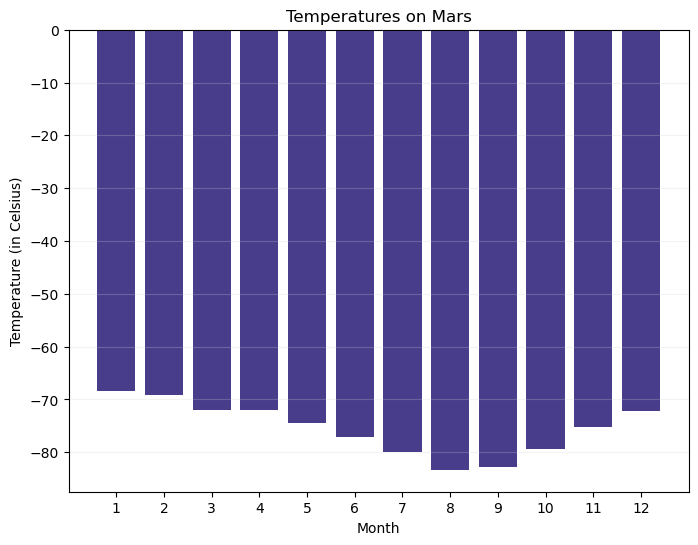

In [15]:
# Plot avg temp vs. month.
# Canvas.
plt.figure(figsize = (8, 6))

# Skeleton.
plt.bar(
    df.month.unique(),
    df.groupby("month").min_temp.mean(),
    color = "darkslateblue"
)

# Formatting.
plt.title("Temperatures on Mars")

plt.xlabel("Month")
plt.xticks(np.arange(1, 13, 1))
plt.xlim(0, 13)

plt.ylabel("Temperature (in Celsius)")
# plt.yticks()
# plt.ylim()

plt.grid(axis = 'y', color = 'lightgray', alpha = .25)

# Show.
plt.show()

In [16]:
# Temperature appears to peak in the 8th/9th month on Mars, and it reaches the lowest point at the 1st month.

In [17]:
# 4. Average pressure by Martian month
df.groupby("month").pressure.mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

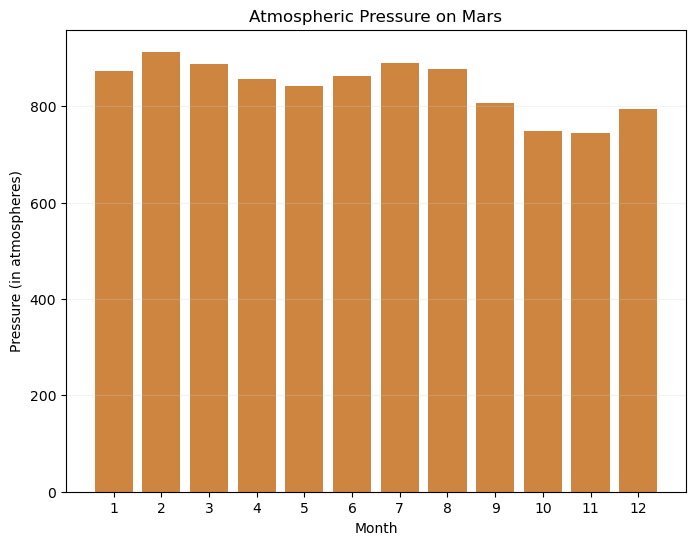

In [18]:
# Plot the avg pressure vs. month.
# Canvas.
plt.figure(figsize = (8, 6))

# Skeleton.
plt.bar(
    df.month.unique(),
    df.groupby("month").pressure.mean(),
    color = "peru"
)

# Formatting.
plt.title("Atmospheric Pressure on Mars")

plt.xlabel("Month")
plt.xticks(np.arange(1, 13, 1))
plt.xlim(0, 13)

plt.ylabel("Pressure (in atmospheres)")
# plt.yticks()
# plt.ylim()

plt.grid(axis = 'y', color = 'lightgray', alpha = .25)

# Show.
plt.show()

In [19]:
# Pressure has two peaks: one in the 2nd month, and one in the 7th/8th month. There is a decline in the 10th and 11th month.

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Grab the start IDs and end IDs for the entire DataFrame.
ls_0 = list()
ls_359 = list()

for i in df.loc[df.ls == 0].iterrows():
    ls_0.append(i[0])
    
for i in df.loc[df.ls == 359].iterrows():
    ls_359.append(i[0])

# Create an empty list to store the results.
results = list()
start = -1
end = -1

# Find start ID greater than prior start ID and prior end ID (initialized so it will start on first iteration).
# Continue throughout both arrays of IDs.
# Add the timedelta between found ranges to the results.
for j in ls_0:
    if (j > start) & (j > end):
        start = j

        for k in ls_359:
            if (k > end) & (k > start):
                end = k

                # Got up to here... huh? Add that time delta in!
                results.append((df.iloc[end].terrestrial_date - df.iloc[start].terrestrial_date))
                break

for l, result in enumerate(results):
    print(f"{result.days} days in year {l+1}.")

# Seems 685 is the amount of days in year on Mars.

685 days in year 1.
685 days in year 2.


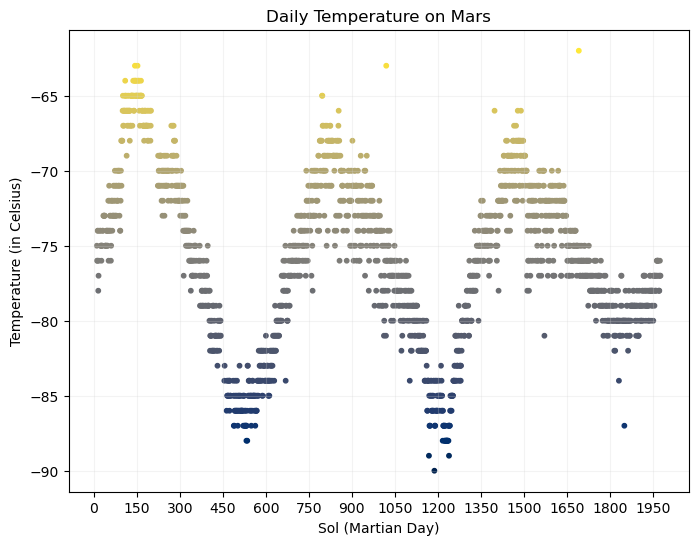

In [21]:
# Plot the daily minimum temperature.
# Canvas.
plt.figure(figsize = (8, 6))

# Skeleton.
plt.scatter(
    df.sol.unique(),
    df.groupby("sol").min_temp.min(),
    cmap = "cividis",
    c = df.groupby("sol").min_temp.min(),
    s = 10
)

# Formatting.
plt.title("Daily Temperature on Mars")

plt.xlabel("Sol (Martian Day)")
plt.xticks(np.arange(0, 2000, 150))
# plt.xlim(0, 13)

plt.ylabel("Temperature (in Celsius)")
# plt.ylim()

plt.grid(color = 'lightgray', alpha = .25)

# Show.
plt.show()

In [22]:
# Visual estimate would be about 650 days judging on where the graph appears to "repeat" itself.
# But, I did the math in the cell above the graph and my real estimate is 685 days in a Martian year.
# And... according to: https://science.nasa.gov/mars/facts/
# "Martian days are called sols – short for "solar day." A year on Mars lasts 669.6 sols, which is the same as 687 Earth days."

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV.
df.to_csv("martian_data.csv")

In [24]:
browser.quit()